#### Author: Chenxi Wang

In [10]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
%matplotlib inline
np.random.seed(1015)

# Problem 1: Setting Up the Data

In [11]:
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [12]:
print X.shape
print Y.shape

(200000, 14)
(200000,)


## Question 1: Min, max, mean, and var of all the features

In [4]:
print 'Min:', np.min(X,axis=0)
print 'Max: ', np.max(X,axis=0)
print 'Mean:', np.mean(X,axis=0)
print 'Var: ', np.var(X,axis=0)

Min: [  1.93500000e+02   1.52500000e+02   2.14250000e+02   1.52500000e+02
   1.00000000e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.75890000e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.90490000e-01  -9.99900000e+02]
Max:  [  2.53000000e+02   2.49000000e+02   2.52500000e+02   2.52500000e+02
   3.10480000e+04   1.36300000e+04   9.23800000e+03   1.25170000e+02
   1.91670000e+01   1.32300000e+01   6.67610000e+01   7.39020000e+01
   9.75040000e+02   7.97200000e+02]
Mean: [  2.41601104e+02   2.27376571e+02   2.41554150e+02   2.32826768e+02
   3.08992337e+03   9.28259020e+02   1.38093830e+02   3.24857933e+00
   6.49865290e+00   2.09713912e+00   4.21766041e+00   2.69171845e+00
   1.02715905e+01   5.78148050e+00]
Var:  [  8.34991711e+01   9.26255931e+01   3.52863398e+01   9.76257317e+01
   1.56515138e+07   3.08176182e+06   4.43951746e+05   8.21948502e+00
   6.40504819e+00   4.36344047e+00   4.08637188e+00   2.19877847e+00
   4.04646245e+02   3.40652055e+03]


## Question 2: Min, max, mean, and var of the rescaled features

In [13]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
# subsample for efficiency 
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

In [14]:
print Xtr.shape
print Xva.shape

(160000, 14)
(40000, 14)


In [6]:
## Training data subsample:
print 'Min:', np.min(XtS,axis=0)
print 'Max: ', np.max(XtS,axis=0)
print 'Mean:', np.mean(XtS,axis=0)
print 'Var: ', np.var(XtS,axis=0)

Min: [ -4.96595653  -3.72381682  -4.37149489  -2.66102087  -0.7523898
  -0.52427348  -0.20823371  -1.1534788   -2.14016639  -1.00225435
  -2.13223957  -1.84246917  -0.58771662 -19.46323418]
Max:  [  1.25737502   1.68713468   1.79941665   1.94475467   7.06595521
   7.43475247  15.52027188   8.16587388   4.60231585   4.38870522
   7.23989082  11.55664522  29.72711867  12.0454918 ]
Mean: [ -1.91260008e-14   1.11883836e-15   1.33668632e-14   1.61768376e-14
  -1.65201186e-17   2.47801779e-17   3.86246590e-17  -2.20548024e-15
  -9.69215819e-15   3.60556029e-15   1.20001786e-15   4.90714136e-15
   2.71693779e-16   1.35358391e-16]
Var:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [7]:
## Validation data:
print 'Min:', np.min(XvS,axis=0)
print 'Max: ', np.max(XvS,axis=0)
print 'Mean:', np.mean(XvS,axis=0)
print 'Var: ', np.var(XvS,axis=0)

Min: [ -5.18821837  -3.93395086  -4.66835379  -2.77823675  -0.75289363
  -0.52427348  -0.20823371  -1.1534788   -2.23026098  -1.00225435
  -2.13223957  -1.84246917  -0.58968996 -19.46323418]
Max:  [  1.25737502   2.26500329   1.85742356   1.97911105   7.06595521
   7.43475247  15.6889145    9.37169596   4.47106587   4.44186295
   8.84160019  29.82606178  61.61283427  14.69104124]
Mean: [-0.00606725 -0.00829903 -0.01282366 -0.01128132  0.02532119  0.01904614
  0.03112265 -0.01188227 -0.00071066  0.00280182 -0.02274993 -0.01159353
  0.01136951 -0.02288047]
Var:  [ 1.0193737   1.02293341  1.0310364   0.99452865  1.00168114  1.04849157
  1.32675477  0.98772854  1.00951961  1.00331393  1.0134529   1.02848094
  1.87220677  1.39701562]


# Problem 2: Linear Classfiers

## Question 1: Training and validation AUC on the rescaled data

mltools/linearC.py:122: RuntimeWarning: overflow encountered in exp
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
mltools/linearC.py:122: RuntimeWarning: invalid value encountered in divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


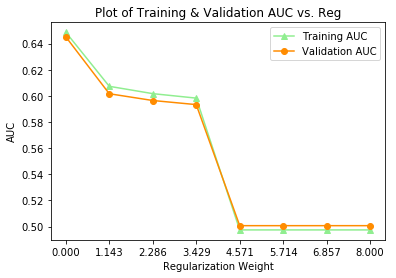

Train AUC: [ 0.64871367  0.60733927  0.60172746  0.59830444  0.49744525  0.49744525
  0.49744525  0.49744525]
Validation AUC: [ 0.64519434  0.60165134  0.59647985  0.59333425  0.50069804  0.50069804
  0.50069804  0.50069804]


In [9]:
Reg = np.linspace( 0, 8, 8 )

auc_tr = np.zeros(Reg.shape[0])
auc_va = np.zeros(Reg.shape[0])

for i, reg in enumerate(Reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=reg, 
                  initStep=0.5, stopTol=1e-6, stopIter=100)
    auc_tr[i] = learner.auc(XtS, Yt)
    auc_va[i] = learner.auc(XvS, Yva)

plt.plot(Reg, auc_tr, marker='^', 
         color = "lightgreen", label = "Training AUC")
plt.plot(Reg, auc_va, marker='o', 
         color = "darkorange", label = "Validation AUC")

plt.xticks(Reg)
plt.xlabel("Regularization Weight")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs. Reg")
plt.legend()
plt.show()

print 'Train AUC:',auc_tr
print 'Validation AUC:', auc_va

## Question 2: Adding degree 2 polynomial features

In [20]:
def Phi(Xtr, Xte):
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    XteP,_ = ml.transforms.rescale(\
    ml.transforms.fpoly(Xte,degree,False), params)
    
    return XtrP, XteP

In [21]:
degree = 2
XtP = Phi(Xt, Xva)[0]
XvaP = Phi(Xt, Xva)[1]

print "Number of Features:", XtP.shape[1]

Number of Features: 119


The number of features is 119, because there are 14 original features, 14 degree 2 features, and $14*13/2$ combinations of any two of the 14 features: 14+14+14*13/2 = 119.

## Question 3: Training and validation AUC for the transformed data

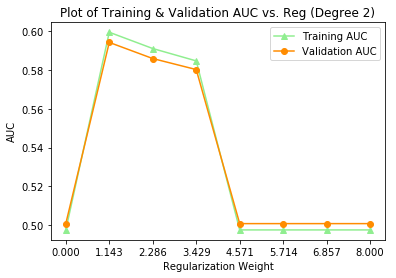

Train AUC: [ 0.49744525  0.59955123  0.59113782  0.58474439  0.49744525  0.49744525
  0.49744525  0.49744525]
Validation AUC: [ 0.50069804  0.59430188  0.58596512  0.58027589  0.50069804  0.50069804
  0.50069804  0.50069804]


In [23]:
Reg = np.linspace( 0, 8, 8 )

auc_tr = np.zeros(Reg.shape[0])
auc_va = np.zeros(Reg.shape[0])

for i, reg in enumerate(Reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtP, Yt, reg=reg, initStep=0.5, stopTol=1e-6, stopIter=100)
    auc_tr[i] = learner.auc(XtP, Yt)
    auc_va[i] = learner.auc(XvaP, Yva)

plt.plot(Reg, auc_tr, marker='^', 
         color = "lightgreen", label = "Training AUC")
plt.plot(Reg, auc_va, marker='o', 
         color = "darkorange", label = "Validation AUC")

plt.xticks(Reg)
plt.xlabel("Regularization Weight")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs. Reg (Degree 2)")
plt.legend()
plt.show()

print 'Train AUC:',auc_tr
print 'Validation AUC:', auc_va    

# Problem 3: Nearest Neighbors

## Question 1: KNN AUC on the rescaled data

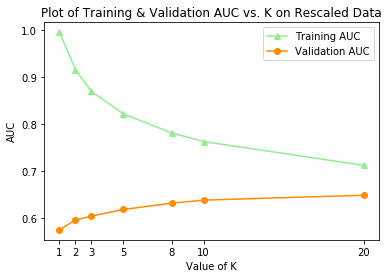

Train AUC: [ 0.99581922  0.91638633  0.86978366  0.82226519  0.78166649  0.76333356
  0.7126086 ]
Validation AUC: [ 0.57531506  0.59662393  0.60467698  0.61883223  0.63216545  0.63869132
  0.64913928]


In [24]:
Ks = np.array([1,2,3,5,8,10,20])
auc_tr = np.zeros(Ks.shape[0])
auc_va = np.zeros(Ks.shape[0])

learner = ml.knn.knnClassify()

for i, k in enumerate(Ks):
    learner.train(XtS, Yt, K=k, alpha=0.0)
    auc_tr[i] = learner.auc(XtS, Yt)
    auc_va[i] = learner.auc(XvS, Yva)

plt.plot(Ks, auc_tr, marker='^', 
         color = "lightgreen", label = "Training AUC")
plt.plot(Ks, auc_va, marker='o', 
         color = "darkorange", label = "Validation AUC")
plt.xticks(Ks)
plt.xlabel("Value of K")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs. K on Rescaled Data")
plt.legend()
plt.show()

print 'Train AUC:',auc_tr
print 'Validation AUC:', auc_va    

## Question 2: KNN AUC on the original data

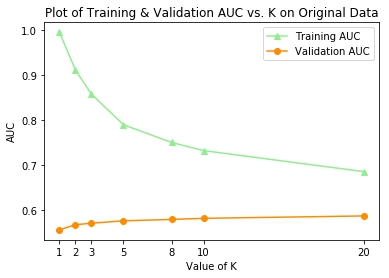

Train AUC: [ 0.99581922  0.91194166  0.85813596  0.79015228  0.75082808  0.73266146
  0.68598389]
Validation AUC: [ 0.55633021  0.56793061  0.57123356  0.57657049  0.57958244  0.58210148
  0.58740477]


In [25]:
Ks = np.array([1,2,3,5,8,10,20])
auc_tr = np.zeros(Ks.shape[0])
auc_va = np.zeros(Ks.shape[0])

learner = ml.knn.knnClassify()

for i, k in enumerate(Ks):
    learner.train(Xt, Yt, K=k, alpha=0.0)
    auc_tr[i] = learner.auc(Xt, Yt)
    auc_va[i] = learner.auc(Xva, Yva)

plt.plot(Ks, auc_tr, marker='^', 
         color = "lightgreen", label = "Training AUC")
plt.plot(Ks, auc_va, marker='o', 
         color = "darkorange", label = "Validation AUC")
plt.xticks(Ks)
plt.xlabel("Value of K")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs. K on Original Data")
plt.legend()
plt.show()

print 'Train AUC:',auc_tr
print 'Validation AUC:', auc_va    

## Question 3: 

mltools/knn.py:103: RuntimeWarning: invalid value encountered in divide
  prob[i,:] = count / count.sum()    # save (soft) results


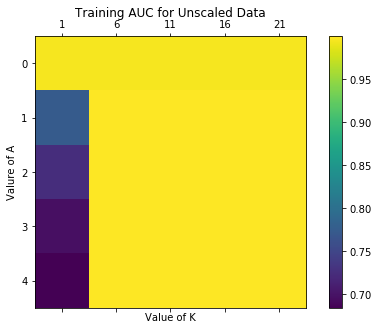

Train AUC: [[ 0.99581922  0.99581922  0.99581922  0.99581922  0.99581922]
 [ 0.77487202  0.99996861  0.99997004  0.99997363  0.99997363]
 [ 0.72533913  0.99996861  0.99997004  0.99997363  0.99997363]
 [ 0.6970962   0.99996861  0.99997004  0.99997363  0.99997363]
 [ 0.6841077   0.99996861  0.99997004  0.99997363  0.99997363]]


In [14]:
K = range(1,25,5) 
A = range(0,5,1)

tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))

learner = ml.knn.knnClassify()
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner.train(Xt, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(Xt, Yt) 
        va_auc[i][j] = learner.auc(Xva, Yva)

# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))

cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+K)
ax.set_yticklabels(['']+A)
ax.set_xlabel("Value of K")
ax.set_ylabel("Valure of A")
ax.set_title("Training AUC for Unscaled Data")

plt.show()

print 'Train AUC:',tr_auc

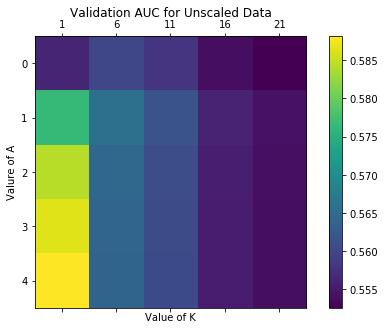

Validation AUC: [[ 0.55633021  0.5601514   0.55800723  0.55387183  0.55260058]
 [ 0.57648023  0.56567646  0.56171123  0.55618292  0.55435489]
 [ 0.58440001  0.56462195  0.56093725  0.55559858  0.55402338]
 [ 0.5864064   0.56421772  0.56068502  0.55543542  0.55389522]
 [ 0.58815704  0.56407828  0.56061919  0.55537802  0.55385499]]


In [15]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax2 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax2)
ax.set_xticklabels(['']+K)
ax.set_yticklabels(['']+A)
ax.set_xlabel("Value of K")
ax.set_ylabel("Valure of A")
ax.set_title("Validation AUC for Unscaled Data")

plt.show()

print 'Validation AUC:',va_auc

Based on the results so far, I recommend k = 1, and $\alpha$ = 4. 

# Problem 4: Decision Trees

## Question 1: Varying maxDepth

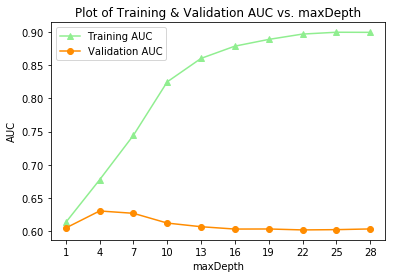

Train AUC: [ 0.61304042  0.67733548  0.74443438  0.82506078  0.86042826  0.87888819
  0.88902881  0.89708531  0.89985211  0.89969002]
Validation AUC: [ 0.60460704  0.63030613  0.62676844  0.61204064  0.60654682  0.60300957
  0.60313137  0.60172181  0.60212378  0.60320315]


In [7]:
maxd = np.array(range(1,30,3))
auc_tr = np.zeros(maxd.shape[0])
auc_va = np.zeros(maxd.shape[0])

learner = ml.dtree.treeClassify()
for i, d in enumerate(maxd): 
    learner.train(XtS, Yt, maxDepth = d, minParent = 5, minLeaf= 9)
    auc_tr[i] = learner.auc(XtS, Yt)
    auc_va[i] = learner.auc(XvS, Yva)
    
plt.plot(maxd, auc_tr, marker='^', 
         color = "lightgreen", label = "Training AUC")
plt.plot(maxd, auc_va, marker='o', 
         color = "darkorange", label = "Validation AUC")
plt.xticks(maxd)
plt.xlabel("maxDepth")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs. maxDepth")
plt.legend()
plt.show()

print 'Train AUC:', auc_tr
print 'Validation AUC:', auc_va

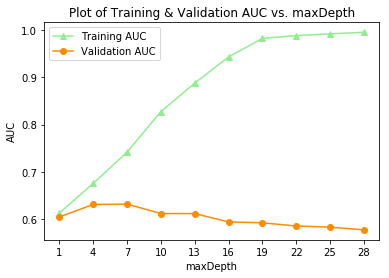

Train AUC: [ 0.61304042  0.67565752  0.74185775  0.82738501  0.88776336  0.94314764
  0.98235479  0.98842154  0.99200718  0.99546994]
Validation AUC: [ 0.60460704  0.63119561  0.63182031  0.61188022  0.61177081  0.59419343
  0.59228499  0.58546516  0.58316589  0.57720699]


In [29]:
maxd = np.array(range(1,30,3))
auc_tr = np.zeros(maxd.shape[0])
auc_va = np.zeros(maxd.shape[0])

learner = ml.dtree.treeClassify()
for i, d in enumerate(maxd): 
    learner.train(XtS, Yt, maxDepth = d)
    auc_tr[i] = learner.auc(XtS, Yt)
    auc_va[i] = learner.auc(XvS, Yva)
    
plt.plot(maxd, auc_tr, marker='^', 
         color = "lightgreen", label = "Training AUC")
plt.plot(maxd, auc_va, marker='o', 
         color = "darkorange", label = "Validation AUC")
plt.xticks(maxd)
plt.xlabel("maxDepth")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs. maxDepth")
plt.legend()
plt.show()

print 'Train AUC:', auc_tr
print 'Validation AUC:', auc_va

## Question 2: Plot the number of nodes in the tree as maxDepth is varied

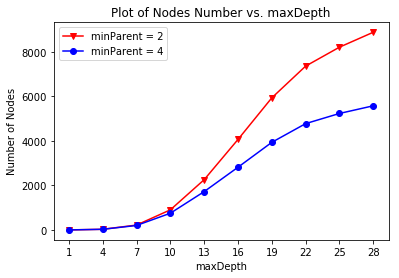

In [31]:
## Plot the number of nodes in the tree as maxDepth is varied:
maxd = np.array(range(1,30,3))
Nodes = np.zeros(maxd.shape[0])

learner = ml.dtree.treeClassify()
for i, d in enumerate(maxd): 
    learner.train(Xt, Yt, maxDepth = d)
    Nodes[i] = learner.sz

plt.plot(maxd, Nodes, marker='v', 
          color = "red", label = "minParent = 2")

## Plot another line by increasing minParent:
for i, d in enumerate(maxd): 
    learner.train(Xt, Yt, maxDepth = d, minParent = 4)
    Nodes[i] = learner.sz
    
plt.plot(maxd, Nodes, marker='o', 
          color = "blue", label = "minParent = 4")

plt.xticks(maxd)
plt.xlabel("maxDepth")
plt.ylabel("Number of Nodes")
plt.title("Plot of Nodes Number vs. maxDepth")
plt.legend()
plt.show()

## Question 3

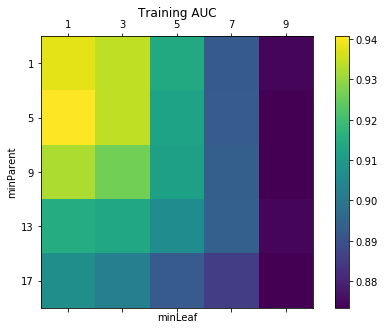

Train AUC: [[ 0.93795517  0.93428853  0.91439739  0.89240653  0.8741773 ]
 [ 0.94075094  0.93429768  0.91239042  0.89277698  0.87339361]
 [ 0.93244705  0.92651107  0.91175886  0.89373683  0.87343819]
 [ 0.91515147  0.91387661  0.90613996  0.89415742  0.87465556]
 [ 0.90687916  0.9024901   0.89270926  0.88560175  0.87337881]]


In [32]:
## Set maxDepth = 15:
P = range(1,21,4) 
L = range(1,11,2)

tr_auc = np.zeros((len(P),len(L)))
va_auc = np.zeros((len(P),len(L)))

for i,p in enumerate(P):
    for j,l in enumerate(L):
        learner = ml.dtree.treeClassify()
        learner.train(Xt, Yt, maxDepth = 15, minParent = p, minLeaf= l)
        tr_auc[i][j] = learner.auc(Xt, Yt) # train learner using k and a
        va_auc[i][j] = learner.auc(Xva, Yva)

# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))

cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+L)
ax.set_yticklabels(['']+P)
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
ax.set_title("Training AUC")

plt.show()

print 'Train AUC:',tr_auc

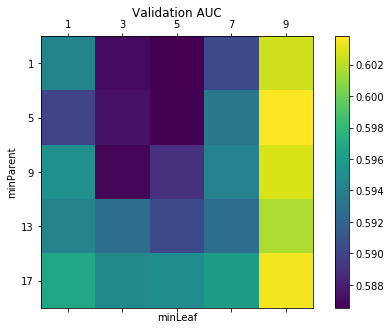

Validation AUC: [[ 0.5943419   0.58707311  0.58654198  0.5903947   0.60260203]
 [ 0.59002152  0.58736216  0.58653661  0.59342625  0.6038203 ]
 [ 0.59520043  0.58675224  0.58898664  0.59420234  0.60282579]
 [ 0.59423663  0.59281186  0.59040349  0.59276543  0.60169204]
 [ 0.59682895  0.5948069   0.59491163  0.59604387  0.60353626]]


In [33]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax2 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax2)
ax.set_xticklabels(['']+L)
ax.set_yticklabels(['']+P)
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
ax.set_title("Validation AUC")

plt.show() 

print 'Validation AUC:',va_auc

Recommend: minParent = 5; minLeaf = 9 

# Problem 5: Neural Networks

## Question 1: 

In [83]:
layers = range(1,6,1) 
nodes = range(2,7,1) 

tr_auc = np.zeros((len(layers),len(nodes)))
va_auc = np.zeros((len(layers),len(nodes)))


for i, layer in enumerate(layers):
    for j, node in enumerate(nodes):
        nn = ml.nnet.nnetClassify()
        size = [XtS.shape[1]] + layer*[node] + [2]
        nn.init_weights(size, 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt) 
        va_auc[i][j] = nn.auc(XvS, Yva)

print "tr_auc:", tr_auc
print "va_auc:", va_auc

tr_auc: [[ 0.64852701  0.63032935  0.65100651  0.67038987  0.68376407]
 [ 0.55799151  0.61380876  0.61684716  0.68014605  0.67360336]
 [ 0.4456614   0.61296364  0.4472259   0.56778625  0.38836514]
 [ 0.54485671  0.51841096  0.62125506  0.57280839  0.49886255]
 [ 0.45881692  0.57272498  0.54909212  0.54348489  0.42154185]]
va_auc: [[ 0.64222248  0.62586307  0.64384423  0.65508423  0.66542124]
 [ 0.54760206  0.60713567  0.61143342  0.66641338  0.66332461]
 [ 0.44130412  0.60683947  0.44873277  0.55931188  0.39685233]
 [ 0.53776859  0.50984948  0.6167087   0.56890265  0.50272248]
 [ 0.45684577  0.57163414  0.54629433  0.53964789  0.4256257 ]]


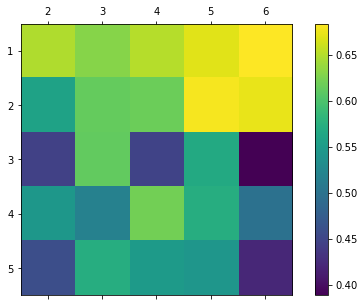

In [84]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)

plt.show()

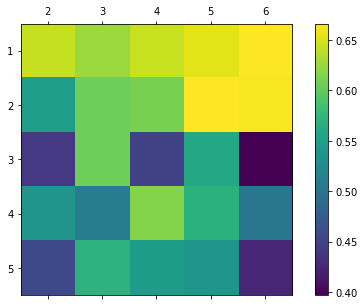

In [86]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax2 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax2)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)

plt.show()

Based on the results, I would recommend number of layers = 2, and number of nodes = 6.

## Question 2: Implementing a new activation function

In [78]:
## Use Gaussian as the activation function:
sig = lambda z: np.atleast_2d(np.exp(-z**2/2))
dsig = lambda z: np.atleast_2d(-z*np.exp(-z**2/2))

nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 6, 6, 2], 'random', XtS, Yt)
nn.setActivation('custom', sig, dsig)

nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=100)

print("{0:>15}: {1:.4f}".format('Gaussian Train AUC',nn.auc(XtS, Yt)))
print("{0:>15}: {1:.4f}".format('Gaussian Validation AUC', nn.auc(XvS, Yva)))


Gaussian Train AUC: 0.5528
Gaussian Validation AUC: 0.5560


In [66]:
## Use reLu as the activation function:
sig = lambda z: np.atleast_2d(np.maximum(0,z))
dsig = lambda z: np.atleast_2d((z > 0) * 1 + (z <= 0) * 0)

nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 6, 6, 2], 'random', XtS, Yt)
nn.setActivation('custom', sig, dsig)

nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=100)

print("{0:>15}: {1:.4f}".format('ReLu Train AUC',nn.auc(XtS, Yt)))
print("{0:>15}: {1:.4f}".format('ReLu Validation AUC', nn.auc(XvS, Yva)))


 ReLu Train AUC: 0.4647
ReLu Validation AUC: 0.4651


In [17]:
nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 6, 6, 2], 'random', XtS, Yt)
nn.setActivation('logistic')

nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)

print("{0:>15}: {1:.4f}".format('Logistic Train AUC',nn.auc(XtS, Yt)))
print("{0:>15}: {1:.4f}".format('Logistic Validation AUC', nn.auc(XvS, Yva)))


Logistic Train AUC: 0.6429
Logistic Validation AUC: 0.6395


In [48]:
nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 6, 6, 2], 'random', XtS, Yt)
nn.setActivation('htangent')

nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)

print("{0:>15}: {1:.4f}".format('Htangent Train AUC',nn.auc(XtS, Yt)))
print("{0:>15}: {1:.4f}".format('Htangent Validation AUC', nn.auc(XvS, Yva)))


Htangent Train AUC: 0.6775
Htangent Validation AUC: 0.6654


It seems using Hyperbolic Tangent as the activation function has the best performence on training and validation AUC.

# Problem 6: Conclusions

In [4]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)

In [27]:

learner = ml.dtree.treeClassify()
learner.train(X, Y, maxDepth = 24, minParent = 5, minLeaf= 9)

print("{0:>15}: {1:.4f}".format('Dicision Tree AUC on All Data',learner.auc(X, Y)))

learner = ml.dtree.treeClassify()
learner.train(X, Y, maxDepth = 25, minParent = 5, minLeaf= 9)

print("{0:>15}: {1:.4f}".format('Dicision Tree AUC on All Data',learner.auc(X, Y)))

learner = ml.dtree.treeClassify()
learner.train(X, Y, maxDepth = 26, minParent = 5, minLeaf= 9)

print("{0:>15}: {1:.4f}".format('Dicision Tree AUC on All Data',learner.auc(X, Y)))

learner = ml.dtree.treeClassify()
learner.train(X, Y, maxDepth = 27, minParent = 5, minLeaf= 9)

print("{0:>15}: {1:.4f}".format('Dicision Tree AUC on All Data',learner.auc(X, Y)))

learner = ml.dtree.treeClassify()
learner.train(X, Y, maxDepth = 28, minParent = 5, minLeaf= 9)

print("{0:>15}: {1:.4f}".format('Dicision Tree AUC on All Data',learner.auc(X, Y)))


Dicision Tree AUC on All Data: 0.8910
Dicision Tree AUC on All Data: 0.8941
Dicision Tree AUC on All Data: 0.8968
Dicision Tree AUC on All Data: 0.8989
Dicision Tree AUC on All Data: 0.9004


In [24]:
lis = [15,16,17,18,19,20,21,22,23,24,25]

for i,md in enumerate(lis):
    learner = ml.dtree.treeClassify()
    learner.train(Xtr, Ytr, maxDepth = md, minParent = 5, minLeaf= 9)
    print "maxdepth = ", md, "Va AUC:", learner.auc(Xva, Yva)


maxdepth =  15 Va AUC: 0.707762501055
maxdepth =  16 Va AUC: 0.709872042695
maxdepth =  17 Va AUC: 0.710395195102
maxdepth =  18 Va AUC: 0.711301422328
maxdepth =  19 Va AUC: 0.711590230285
maxdepth =  20 Va AUC: 0.711972620492
maxdepth =  21 Va AUC: 0.713263130677
maxdepth =  22 Va AUC: 0.71313940464
maxdepth =  23 Va AUC: 0.71369829855
maxdepth =  24 Va AUC: 0.714549234622
maxdepth =  25 Va AUC: 0.715021699306


In [28]:
lis = [26,27,28,29,30,31,32,33,34,35]

for i,md in enumerate(lis):
    learner = ml.dtree.treeClassify()
    learner.train(Xtr, Ytr, maxDepth = md, minParent = 5, minLeaf= 9)
    print "maxdepth = ", md, "Va AUC:", learner.auc(Xva, Yva)


maxdepth =  26 Va AUC: 0.714141488751
maxdepth =  27 Va AUC: 0.714157291778
maxdepth =  28 Va AUC: 0.71410882731
maxdepth =  29 Va AUC: 0.715142474426
maxdepth =  30 Va AUC: 0.714276465765
maxdepth =  31 Va AUC: 0.714255310817
maxdepth =  32 Va AUC: 0.713707049928
maxdepth =  33 Va AUC: 0.714316170524
maxdepth =  34 Va AUC: 0.713921878055
maxdepth =  35 Va AUC: 0.71381765723


In [32]:
lis = [24,25,26,27,28,29,30,31,32]
auc = np.zeros(10)
md_VaAuc = np.zeros(len(lis))

for j, md in enumerate(lis):
    for i in range(10):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(X,Y,10,i)
        learner = ml.dtree.treeClassify()
        learner.train(Xti, Yti, maxDepth = md, minParent = 5, minLeaf= 9)
        auc[i] = learner.auc(Xvi, Yvi)
    md_VaAuc[j] = np.mean(auc)
    print "maxDepth:", md, "mean Va AUC:", md_VaAuc[j]
    

maxDepth: 24 mean Va AUC: 0.719175084193
maxDepth: 25 mean Va AUC: 0.719408968918
maxDepth: 26 mean Va AUC: 0.719448718089
maxDepth: 27 mean Va AUC: 0.720157500149
maxDepth: 28 mean Va AUC: 0.720106436077
maxDepth: 29 mean Va AUC: 0.719626094824
maxDepth: 30 mean Va AUC: 0.719871019591
maxDepth: 31 mean Va AUC: 0.720167316034
maxDepth: 32 mean Va AUC: 0.719607550047


In [33]:
md = 33
for i in range(10):
    Xti,Xvi,Yti,Yvi = ml.crossValidate(X,Y,10,i)
    learner = ml.dtree.treeClassify()
    learner.train(Xti, Yti, maxDepth = md, minParent = 5, minLeaf= 9)
    auc[i] = learner.auc(Xvi, Yvi)

md_VaAuc[j] = np.mean(auc)
print "maxDepth:", md, "mean Va AUC:", md_VaAuc[j]



maxDepth: 33 mean Va AUC: 0.719950047072


In [34]:
learner = ml.dtree.treeClassify()
learner.train(X, Y, maxDepth = 31, minParent = 5, minLeaf= 9)

I choose decision tree with maxDepth = 15, minParent =5, and minLeaf = 9; Because it has the fastest running speed, and the values of hyper-parameter are determined by the validation AUC performance.

In [35]:
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit2.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

Kaggle Username: Delta Method; Leaderboard AUC: 0.71356

# Statement of Collaboration

I have abided by the rules of conduct and academic honesty adoped by UC Irvine. I did not discuss the specific solutions to this homework with any person.\
\newline
Chenxi Wang\
\newline
10/31/2017